In [ ]:
!pip install yfinance prophet tensorflow

In [ ]:
import yfinance as yf

# Download past 5 years of Apple stock
data = yf.download("AAPL", start="2019-01-01", end="2025-05-31")
data = data[['Close']]
data.dropna(inplace=True)
data.head()


/tmp/ipython-input-2-660454024.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2025-05-31")
[*********************100%***********************]  1 of 1 completed


Price,Close
Ticker,AAPL
Date,
2019-01-02,37.617847
2019-01-03,33.870838
2019-01-04,35.316753
2019-01-07,35.238159
2019-01-08,35.909904


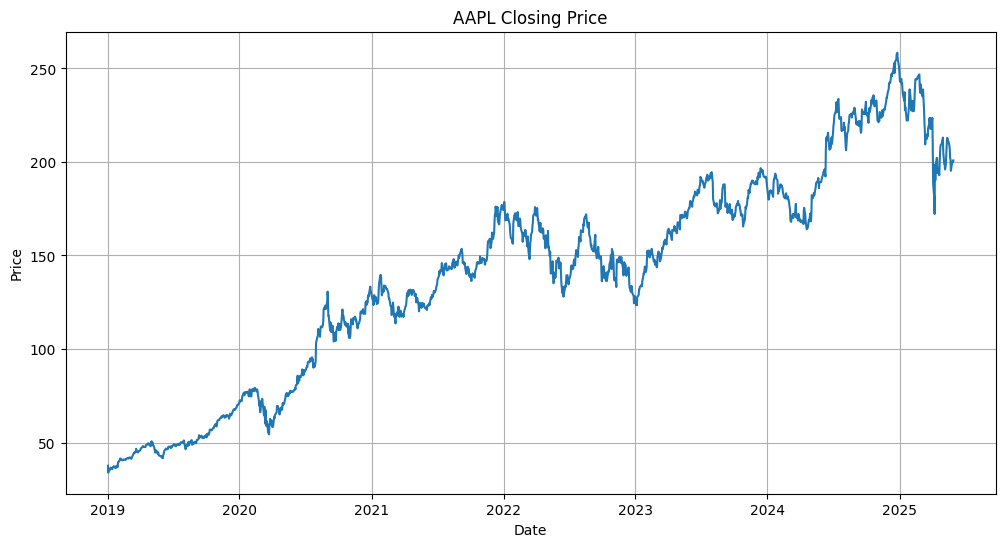

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'])
plt.title('AAPL Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

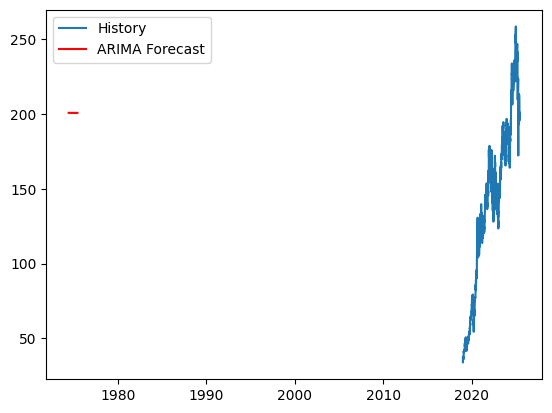

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Close'], order=(5,1,0))  # p,d,q
model_fit = model.fit()
forecast = model_fit.forecast(steps=365)

# Plot
plt.plot(data['Close'], label="History")
plt.plot(forecast.index, forecast, label="ARIMA Forecast", color='red')
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3xcx9dp/u09lxg5e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3xcx9dp/phtn_7w9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57843', 'data', 'file=/tmp/tmpa3xcx9dp/u09lxg5e.json', 'init=/tmp/tmpa3xcx9dp/phtn_7w9.json', 'output', 'file=/tmp/tmpa3xcx9dp/prophet_modell3zw_5yf/prophet_model-20250717132522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:25:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:25:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


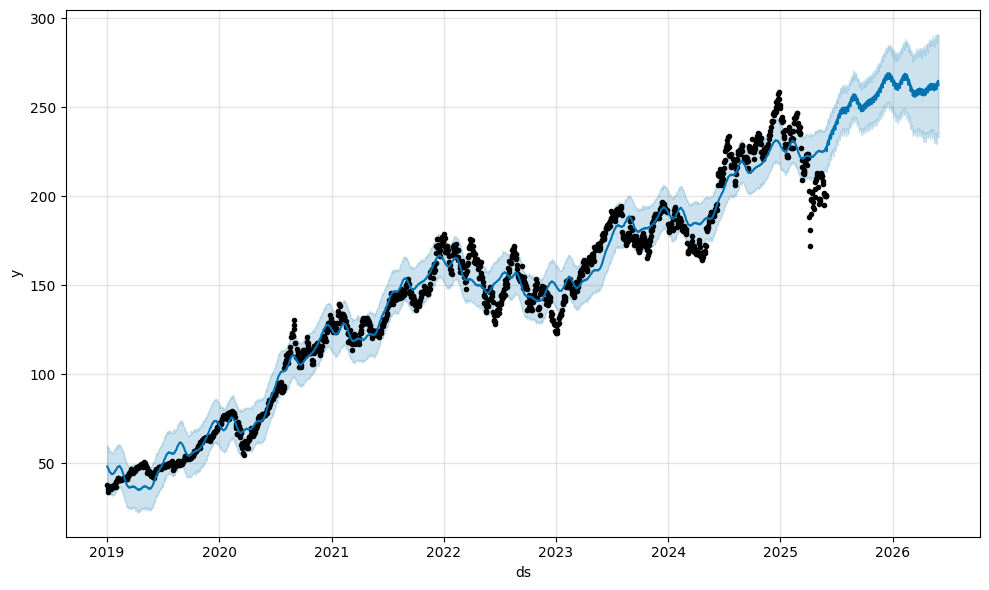

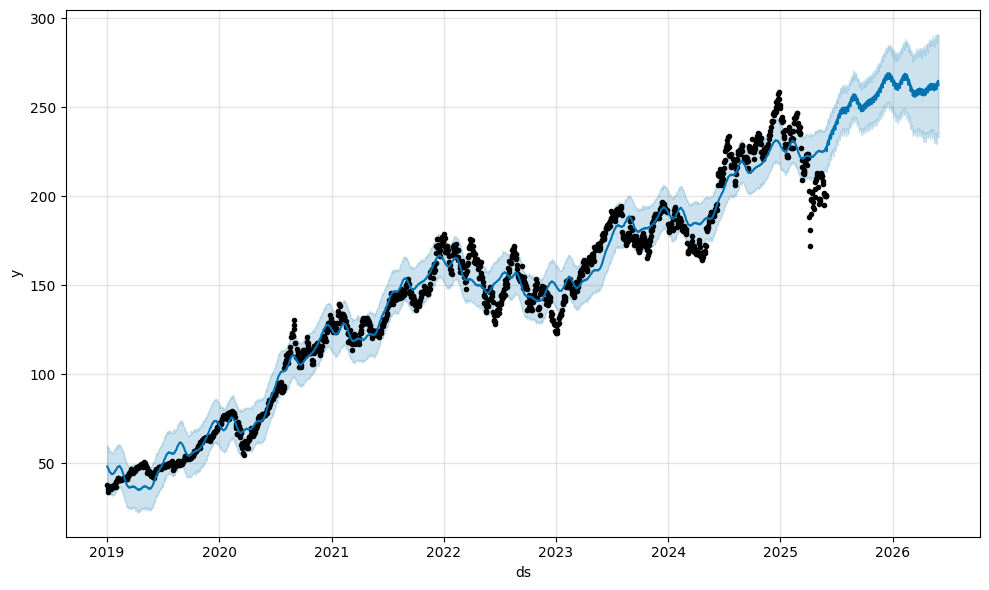

In [ ]:
from prophet import Prophet
import pandas as pd

# data in Prophet format
df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

# Instantiate and fit the model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# future dataframe and predict
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

# Plot forecast
prophet_model.plot(forecast)

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

X, y = [], []
for i in range(60, len(scaled_data)):
    X.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, y, epochs=5, batch_size=32)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0698
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0010
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 8.5383e-04
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.2648e-04
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 8.3909e-04


/tmp/ipython-input-7-628375762.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2025-05-31")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)

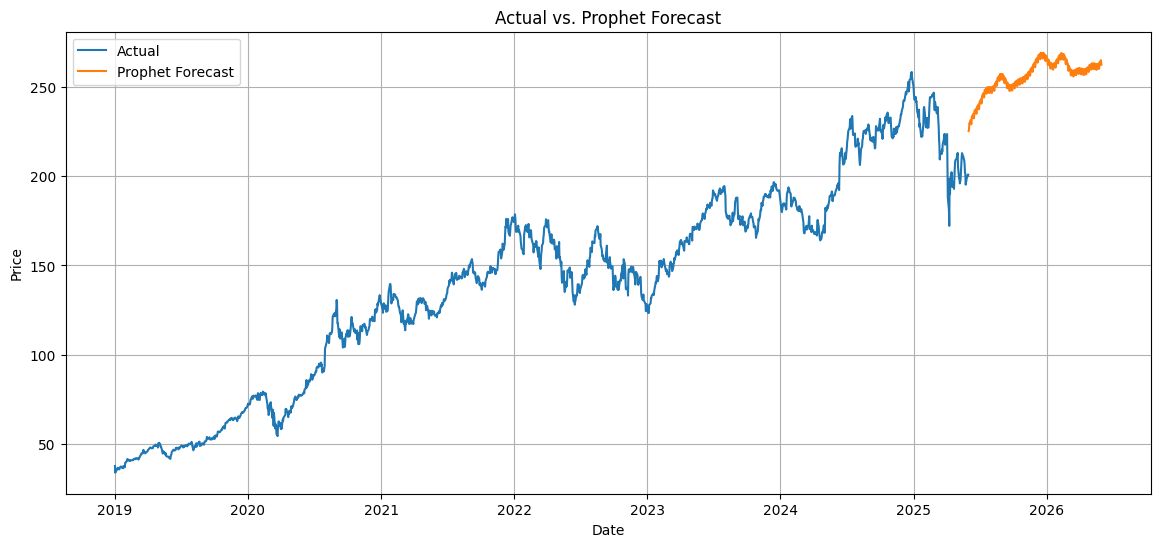

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
import yfinance as yf

# Download past 5 years of Apple stock
data = yf.download("AAPL", start="2019-01-01", end="2025-05-31")
data = data[['Close']]
data.dropna(inplace=True)
# data.head()


# the last date from the historical data
last_date = data.index[-1]

# a date range for the ARIMA forecast starting from the day after the last historical date
arima_future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=365, freq='D')

#  the ARIMA forecast
# Training the ARIMA model and get the fitted model
model = ARIMA(data['Close'], order=(5,1,0))
model_fit = model.fit()

arima_forecast_values = model_fit.forecast(steps=365)

#  pandas Series for the ARIMA forecast with future dates as index
arima_forecast_series = pd.Series(arima_forecast_values.values, index=arima_future_dates)

# Prophet Model
# the data in Prophet format
df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']  # Prophet needs columns: 'ds' for date, 'y' for target

# Instantiate and fit the model
prophet_model = Prophet()
prophet_model.fit(df_prophet)

# future dataframe and prediction
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)


# Plot original data and Prophet forecast
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label="Actual")

#  the index where the future forecast starts in the Prophet forecast DataFrame
prophet_future_start_index = forecast[forecast['ds'] > last_date].index[0]
plt.plot(forecast['ds'][prophet_future_start_index:].to_numpy(), forecast['yhat'][prophet_future_start_index:].to_numpy(), label='Prophet Forecast')

plt.title("Actual vs. Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-11-1032222281.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Epoch 1/5



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0592
Epoch 2/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 0.0011
Epoch 3/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - loss: 6.9922e-04
Epoch 4/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 6.7014e-04
Epoch 5/5
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 7.0471e-04


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3xcx9dp/e_skyj_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa3xcx9dp/29xev43f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33431', 'data', 'file=/tmp/tmpa3xcx9dp/e_skyj_h.json', 'init=/tmp/tmpa3xcx9dp/29xev43f.json', 'output', 'file=/tmp/tmpa3xcx9dp/prophet_modelclhdgiiw/prophet_model-20250717134037.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:40:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:40:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step


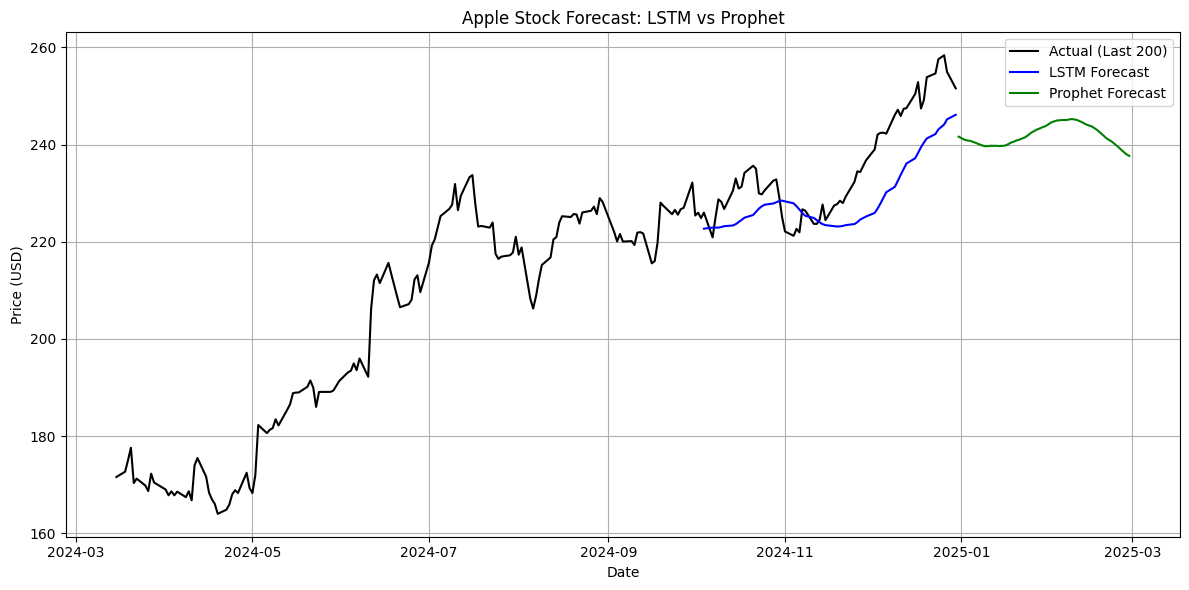

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from prophet import Prophet
import yfinance as yf


# STEP 1: Load and Prepare Data

data = yf.download("AAPL", start="2019-01-01", end="2024-12-31")
data = data[['Close']]
data.dropna(inplace=True)


# Scale Data for LSTM

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences for LSTM (60 timesteps)
X_lstm, y_lstm = [], []
for i in range(60, len(scaled_data)):
    X_lstm.append(scaled_data[i-60:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))


#  STEP 3: Build and Train LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')
lstm_model.fit(X_lstm, y_lstm, epochs=5, batch_size=32)


#  STEP 4: Train Prophet Model

df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=60)
forecast = prophet_model.predict(future)

#  STEP 5: Compare Forecasts

# LSTM Predictions on training data
lstm_predictions = lstm_model.predict(X_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Align LSTM dates (from after 60th record)
lstm_dates = data.index[60:]

# Prophet predictions
prophet_pred = forecast[['ds', 'yhat']].tail(60)
prophet_pred.set_index('ds', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(data.index[-200:], data['Close'].values[-200:], label='Actual (Last 200)', color='black')
plt.plot(lstm_dates[-60:], lstm_predictions[-60:], label='LSTM Forecast', color='blue')
plt.plot(prophet_pred.index, prophet_pred['yhat'], label='Prophet Forecast', color='green')

plt.title("Apple Stock Forecast: LSTM vs Prophet")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
